In [1]:
import sys
sys.path.insert(0, '..')

from python.kkvhash import kkv_hash

In [2]:
test = (0, 1000000, "key") # start <, end ), base word
test_start, test_end, test_base = test

hashes = []
for i in range(test_start, test_end):
    hashes.append(kkv_hash(f"{test_base}{i}".encode()))

In [3]:
# Config
partitions = 4
slots = 8
divisor = partitions * slots

results = [0]*divisor
for hash in hashes:
    results[hash % divisor] += 1

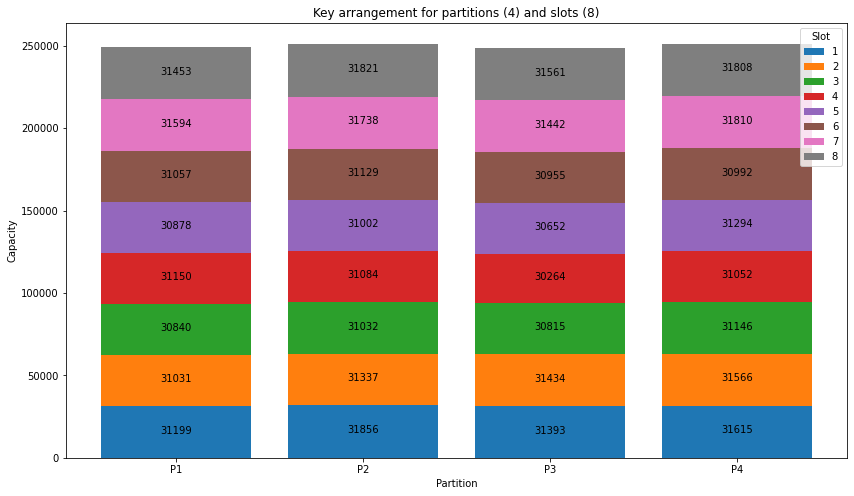

In [4]:
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

fig, ax = plt.subplots()

labels = [f"P{i+1}" for i in range(partitions)]
margins = [0]*partitions

partitions_result = tuple(results[i*slots:i*slots+slots] for i in range(partitions))
slots_result = tuple(zip(*partitions_result))

for i, slots_data in enumerate(slots_result):
    slot_row = ax.bar(labels, slots_data, label=i+1, bottom=margins)
    for index, rect in enumerate(slot_row):
        ax.text(
            rect.get_x() + rect.get_width()/2.,
            slots_data[index]/2 - (100*slots) + margins[index],
            f"{slots_data[index]}",
            ha='center',
        )
    
    margins = list(map(lambda x, y: x + y, margins, slots_result[i]))

ax.set_xlabel('Partition')
ax.set_ylabel('Capacity')
ax.legend(title='Slot')
plt.title(f"Key arrangement for partitions ({partitions}) and slots ({slots})")

plt.show()